In [17]:
import os
os.environ["SPARK_HOME"]="/home/bof/Documents/PROJET/spark-3.5.0-bin-hadoop3"
os.environ["JAVA_HOME"]="/usr/lib/jvm/default-java"

In [18]:
import pyspark
import psycopg2
import threading
import requests
import json
import time
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_unixtime, date_format, hour, dayofmonth
from pyspark.sql.types import FloatType

In [19]:
# Connect to the PostgreSQL database
host = "172.17.0.2"
port = 5432
user = "postgres"
database = "db_atmo"
password = "mysecretpassword"

conn = psycopg2.connect(host=host, port=port, database=database, user=user, password=password)

cur = conn.cursor()


In [20]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

# Créer une instance de SparkSession avec les propriétés de configuration
spark = SparkSession.builder.appName("Données ATMO").config("spark.driver.extraClassPath", "/home/bof/Documents/PROJET/spark-3.5.0-bin-hadoop3/jars/postgresql-42.6.2.jar").config("spark.executor.extraClassPath", "/home/bof/Documents/PROJET/spark-3.5.0-bin-hadoop3/jars/postgresql-42.6.2.jar").getOrCreate()


In [21]:

# Charger les données depuis PostgreSQL
df_indice_atmo = spark.read.format("jdbc").option("url", "jdbc:postgresql://172.17.0.2:5432/db_atmo").option("dbtable", "indice_atmo").option("user", "postgres").option("password", "mysecretpassword").load()

# Charger les données depuis PostgreSQL
df_region = spark.read.format("jdbc").option("url", "jdbc:postgresql://172.17.0.2:5432/db_atmo").option("dbtable", "region").option("user", "postgres").option("password", "mysecretpassword").load()

# Charger les données depuis PostgreSQL
df_epci = spark.read.format("jdbc").option("url", "jdbc:postgresql://172.17.0.2:5432/db_atmo").option("dbtable", "epci").option("user", "postgres").option("password", "mysecretpassword").load()

# Charger les données depuis PostgreSQL
df_annee = spark.read.format("jdbc").option("url", "jdbc:postgresql://172.17.0.2:5432/db_atmo").option("dbtable", "episodes_de_pollution_constatés_sur_l’année_passée").option("user", "postgres").option("password", "mysecretpassword").load()


In [22]:
# Convertir le DataFrame Spark en DataFrame Pandas
df_i = df_indice_atmo.toPandas()
df_r = df_region.toPandas()
df_e = df_epci.toPandas()
df_a = df_annee.toPandas()

In [23]:
df_i

id  code_no2  code_o3  code_pm10  code_pm25  code_qual  code_so2  \
0        1         2        1          2          3          3         1   
1        2         1        1          2          2          2         1   
2        3         1        2          1          1          2         1   
3        4         1        1          1          1          1         1   
4        5         2        1          1          2          2         1   
...    ...       ...      ...        ...        ...        ...       ...   
2035  2036         2        2          2          2          2         1   
2036  2037         1        2          1          1          2         1   
2037  2038         1        2          1          1          2         1   
2038  2039         1        2          1          1          2         1   
2039  2040         1        2          1          1          2         1   

     code_zone coul_qual    date_dif    date_ech epsg_reg lib_qual lib_zone  \
0        26362   #f0e641  2022-01-04  2022-01-03     2154  Dégradé  Valence   
1        26362   #50ccaa  2022-01-05  2022-01-04     2154    Moyen  Valence   
2        26362   #50ccaa  2022-01-06  2022-01-05     2154    Moyen  Valence   
3        26362   #50f0e6  2022-01-07  2022-01-06     2154      Bon  Valence   
4        26362   #50ccaa  2022-01-08  2022-01-07     2154    Moyen  Valence   
...        ...       ...         ...         ...      ...      ...      ...   
2035     26362   #50ccaa  2024-02-15  2024-02-15     2154    Moyen  Valence   
2036     26362   #50ccaa  2024-02-18  2024-02-17     2154    Moyen  Valence   
2037     26362   #50ccaa  2024-02-18  2024-02-18     2154    Moyen  Valence   
2038     26362   #50ccaa  2024-02-18  2024-02-19     2154    Moyen  Valence   
2039     26362   #50ccaa  2024-02-18  2024-02-20     2154    Moyen  Valence   

                         source type_zone                      x_reg  \
0     Atmo Auvergne-Rhône-Alpes   commune  849260.200000000000000000   
1     Atmo Auvergne-Rhône-Alpes   commune  849260.200000000000000000   
2     Atmo Auvergne-Rhône-Alpes   commune  849260.200000000000000000   
3     Atmo Auvergne-Rhône-Alpes   commune  849260.200000000000000000   
4     Atmo Auvergne-Rhône-Alpes   commune  849260.200000000000000000   
...                         ...       ...                        ...   
2035  Atmo Auvergne-Rhône-Alpes   commune  849260.200000000000000000   
2036  Atmo Auvergne-Rhône-Alpes   commune  849260.200000000000000000   
2037  Atmo Auvergne-Rhône-Alpes   commune  849260.200000000000000000   
2038  Atmo Auvergne-Rhône-Alpes   commune  849260.200000000000000000   
2039  Atmo Auvergne-Rhône-Alpes   commune  849260.200000000000000000   

                   x_wgs84                       y_reg                y_wgs84  
0     4.892107529616570000  6427795.900000000000000000  44.933269680647700000  
1     4.892107529616570000  6427795.900000000000000000  44.933269680647700000  
2     4.892107529616570000  6427795.900000000000000000  44.933269680647700000  
3     4.892107529616570000  6427795.900000000000000000  44.933269680647700000  
4     4.892107529616570000  6427795.900000000000000000  44.933269680647700000  
...                    ...                         ...                    ...  
2035  4.892107529616560000  6427795.900000000000000000  44.933269680647800000  
2036  4.892107529616560000  6427795.900000000000000000  44.933269680647800000  
2037  4.892107529616560000  6427795.900000000000000000  44.933269680647800000  
2038  4.892107529616560000  6427795.900000000000000000  44.933269680647800000  
2039  4.892107529616560000  6427795.900000000000000000  44.933269680647800000  

[2040 rows x 20 columns]

In [24]:
import pandas as pd

# Convertir le DataFrame Spark en DataFrame Pandas
df_i = df_indice_atmo.toPandas()

# Ajouter une colonne pour l'année
df_y= df_i['year'] = pd.to_datetime(df_i['date_ech']).dt.year

# Ajouter une colonne pour le mois
df_m= df_i['month'] = pd.to_datetime(df_i['date_ech']).dt.month
df_d= df_i['day'] = pd.to_datetime(df_i['date_ech']).dt.day

# Afficher les premières lignes du DataFrame
print(df_d)


0        3
1        4
2        5
3        6
4        7
        ..
2035    15
2036    17
2037    18
2038    19
2039    20
Name: date_ech, Length: 2040, dtype: int32


In [53]:
# Ajouter des colonnes pour l'année et le mois
df_i['year'] = pd.to_datetime(df_i['date_ech']).dt.year
df_i['month'] = pd.to_datetime(df_i['date_ech']).dt.month

# Grouper par année et par mois, puis calculer la moyenne des indices
average_by_month = df_i.groupby(['year', 'month'])['code_qual'].mean()

print(average_by_month)


year  month
2022  1        2.806452
      2        2.107143
      3        2.967742
      4        2.566667
      5        3.032258
      6        3.100000
      7        3.193548
      8        3.064516
      9        2.100000
      10       2.129032
      11       2.066667
      12       2.225806
2023  1        2.118280
      2        2.845238
      3        2.526882
      4        2.211111
      5        2.440860
      6        3.134831
      7        2.774194
      8        2.731183
      9        2.656250
      10       2.219512
      11       2.033333
      12       2.290323
2024  1        2.516129
      2        2.050000
Name: code_qual, dtype: float64


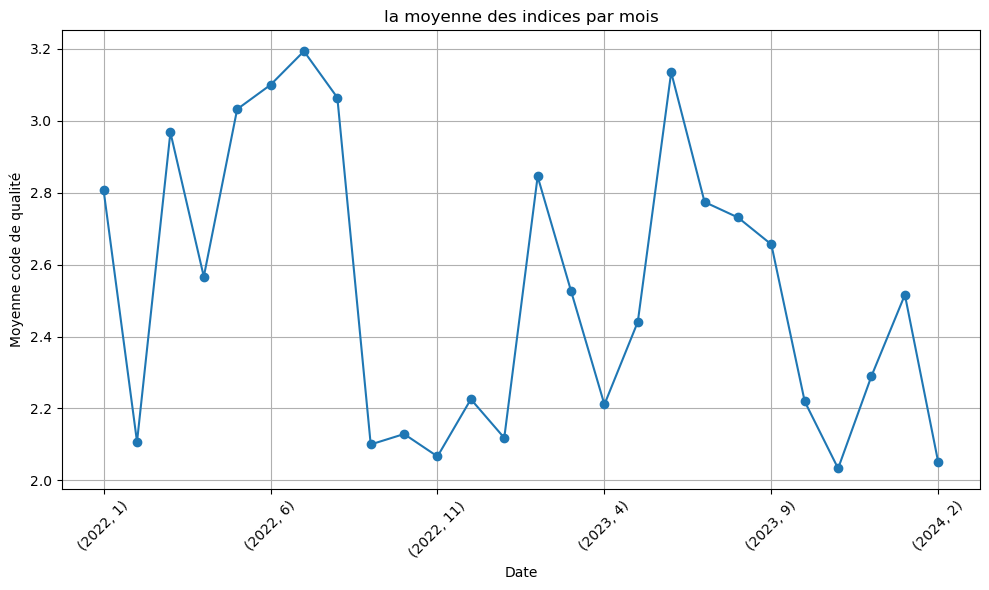

In [54]:
# Affichage des données par jour
plt.figure(figsize=(10, 6))
average_by_month.plot(kind='line', marker='o')
plt.title('la moyenne des indices par mois')
plt.xlabel('Date')
plt.ylabel('Moyenne code de qualité')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()



# Prediction


In [55]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Convertir le DataFrame Spark en DataFrame Pandas
df_i = df_indice_atmo.toPandas()

# Ajouter des colonnes pour l'année et le mois
df_i['date_ech'] = pd.to_datetime(df_i['date_ech'])
df_i['year'] = df_i['date_ech'].dt.year
df_i['month'] = df_i['date_ech'].dt.month

# Grouper par année et par mois, puis calculer la moyenne des indices
average_by_month = df_i.groupby(['year', 'month'])['code_qual'].mean()

# Ajuster le modèle ARIMA
model = ARIMA(average_by_month, order=(5,1,0))  # Exemple d'ordre, à ajuster selon vos données
model_fit = model.fit()

# Faire des prédictions sur les trois prochains mois
forecast = model_fit.forecast(steps=12)  # Prédire les trois prochains mois

print("Prédictions pour les douze prochains mois:")
print(forecast)


Prédictions pour les douze prochains mois:
26    2.283503
27    2.272107
28    2.238184
29    2.158081
30    2.336321
31    2.214724
32    2.252495
33    2.236681
34    2.277318
35    2.205416
36    2.266565
37    2.235976
Name: predicted_mean, dtype: float64


/home/bof/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/bof/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/bof/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/bof/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/bof/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is

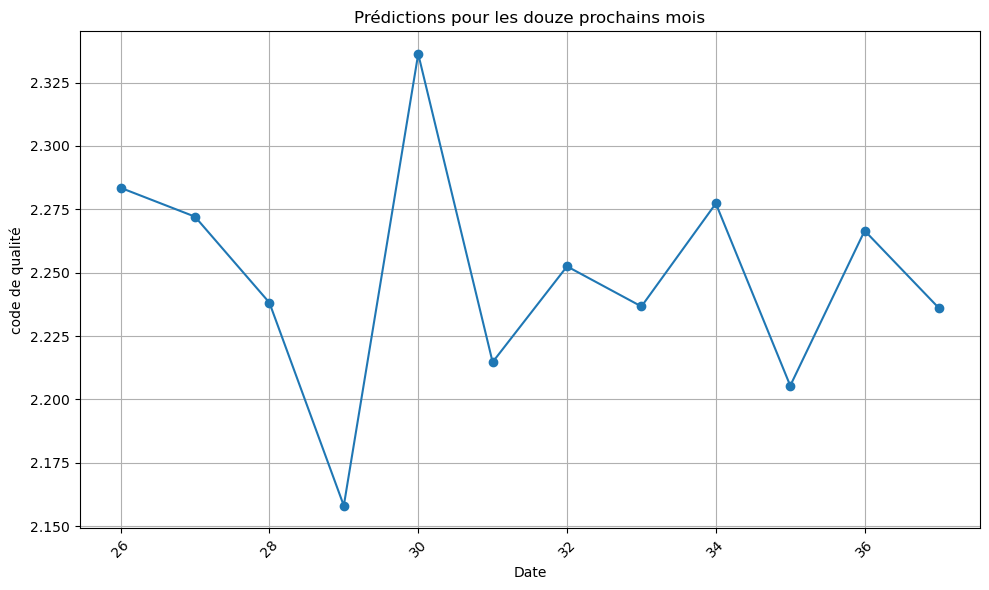

In [57]:
# Affichage des données par jour
plt.figure(figsize=(10, 6))
forecast.plot(kind='line', marker='o')
plt.title('Prédictions pour les douze prochains mois')
plt.xlabel('Date')
plt.ylabel('code de qualité')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

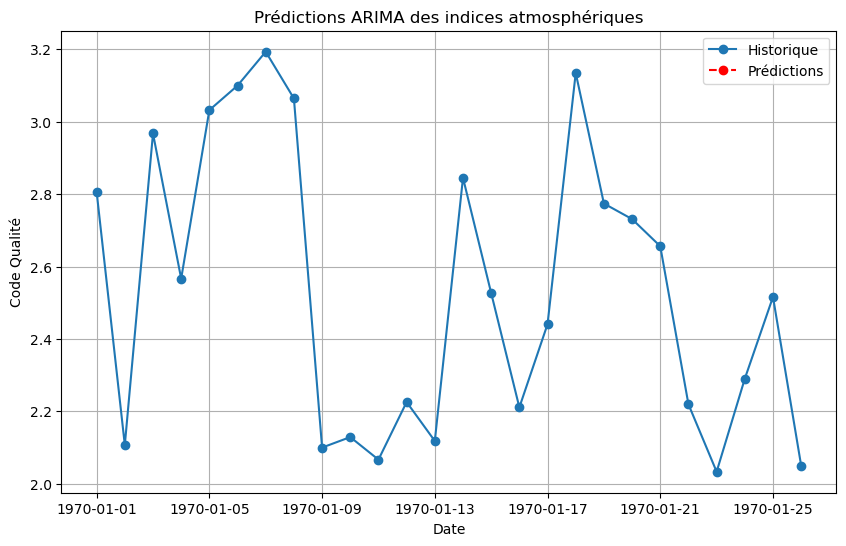

In [37]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Convertir le DataFrame Spark en DataFrame Pandas
df_i = df_indice_atmo.toPandas()

# Ajouter des colonnes pour l'année et le mois
df_i['date_ech'] = pd.to_datetime(df_i['date_ech'])
df_i['year'] = df_i['date_ech'].dt.year
df_i['month'] = df_i['date_ech'].dt.month

# Grouper par année et par mois, puis obtenir une valeur représentative de code_qual
average_by_month = df_i.groupby(['year', 'month']).agg({'code_qual': 'mean'}).reset_index()

# Ajuster le modèle ARIMA
model = ARIMA(average_by_month['code_qual'], order=(5,1,0))  # Exemple d'ordre, à ajuster selon vos données
model_fit = model.fit()

# Faire des prédictions sur les trois prochains mois
forecast = model_fit.forecast(steps=3)  # Prédire les trois prochains mois

# Créer un DataFrame pour les prédictions
last_year, last_month = average_by_month[['year', 'month']].iloc[-1]
predicted_months = pd.date_range(start=f"{last_year}-{last_month}-01", periods=3, freq='M')
predicted_data = pd.DataFrame({'code_qual': forecast}, index=predicted_months)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(average_by_month.index, average_by_month['code_qual'], marker='o', label='Historique')
plt.plot(predicted_data.index, predicted_data['code_qual'], linestyle='--', marker='o', color='red', label='Prédictions')
plt.title('Prédictions ARIMA des indices atmosphériques')
plt.xlabel('Date')
plt.ylabel('Code Qualité')
plt.legend()
plt.grid(True)
plt.show()


In [48]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Convertir le DataFrame Spark en DataFrame Pandas
df_i = df_indice_atmo.toPandas()

# Ajouter des colonnes pour l'année et le mois
df_i['date_ech'] = pd.to_datetime(df_i['date_ech'])
df_i['year'] = df_i['date_ech'].dt.year
df_i['month'] = df_i['date_ech'].dt.month

# Grouper par année et par mois, puis calculer la moyenne des indices
average_by_month = df_i.groupby(['year', 'month'])['code_qual'].mean()

# Ajuster le modèle SARIMA
model_sarima = SARIMAX(average_by_month, 
                       order=(5,1,0), 
                       seasonal_order=(1,1,0,12))  # Exemple d'ordre, à ajuster selon vos données
model_sarima_fit = model_sarima.fit()

# Faire des prédictions sur les trois prochains mois
forecast = model_sarima_fit.forecast(steps=12)  # Prédire les trois prochains mois

print("Prédictions pour les douze prochains mois:")
print(forecast)

/home/bof/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/bof/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16920D-01    |proj g|=  7.57091D-01

At iterate    5    f=  2.73816D-01    |proj g|=  2.09153D-01

At iterate   10    f=  2.50268D-01    |proj g|=  9.55065D-02

At iterate   15    f=  2.25417D-01    |proj g|=  1.99005D-01

At iterate   20    f=  2.21518D-01    |proj g|=  4.09496D-02

At iterate   25    f=  2.19828D-01    |proj g|=  2.06345D-02

At iterate   30    f=  2.19399D-01    |proj g|=  5.64417D-02

At iterate   35    f=  2.17092D-01    |proj g|=  3.02372D-02

At iterate   40    f=  2.15547D-01    |proj g|=  6.67870D-02

At iterate   45    f=  2.15057D-01    |proj g|=  5.25976D-02

At iterate   50    f=  2.14647D-01    |proj g|=  4.47010D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/bof/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/bof/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/bof/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


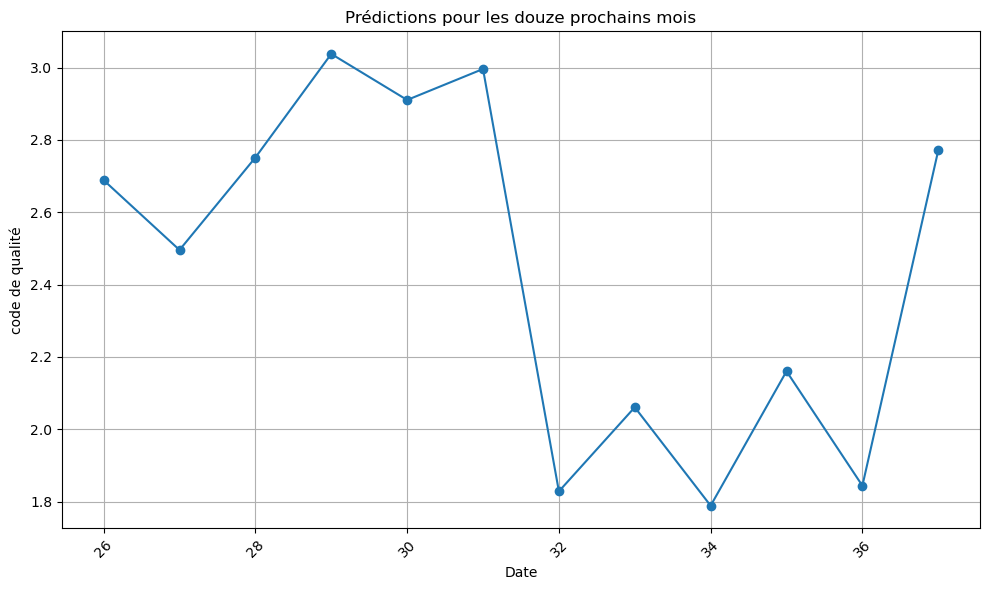

In [50]:
# Affichage des données par jour
plt.figure(figsize=(10, 6))
forecast.plot(kind='line', marker='o')
plt.title('Prédictions pour les douze prochains mois')
plt.xlabel('Date')
plt.ylabel('code de qualité')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()